In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
pd.set_option('display.max_columns',None)

In [96]:
df_train = pd.read_csv('train.csv')
y_train = df_train.pop('cnt')
df_test = pd.read_csv('test.csv')

#concat the data for manipulations
df_concat = pd.concat((df_train,df_test))
df_train.shape

(10948, 9)

In [97]:
df_test.shape

(6431, 9)

In [98]:
df_concat.shape

(17379, 10)

In [99]:
df_concat.head()

,Unnamed: 0,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,ID
0,3094.0,2011-05-13,20,2,0.52,0.5000,0.83,0.1343,22,NaN
1,10645.0,2012-03-24,16,3,0.50,0.4848,0.94,0.2985,49,NaN
2,2114.0,2011-04-02,23,1,0.32,0.3182,0.61,0.1642,20,NaN
3,15289.0,2012-10-04,6,3,0.62,0.5455,0.94,0.0896,1,NaN
4,2273.0,2011-04-09,14,2,0.36,0.3485,0.81,0.1343,94,NaN


In [100]:
# drop unnamed:0 and ID columns
df_c = df_concat.drop(columns=['Unnamed: 0','ID'])

In [101]:
#Conver date to numeric
import datetime as dt
df_c['dteday'] =  pd.to_datetime(df_c['dteday'])
#df_c['dteday'] = df_c['dteday'].dt.strftime("%Y%m%d").astype(int)
df_c['year'] = df_c['dteday'].dt.year.astype(int)
df_c['month'] = df_c['dteday'].dt.month.astype(int)
df_c['day'] = df_c['dteday'].dt.day.astype(int)
df_c.pop('dteday')

0      2011-05-13
1      2012-03-24
2      2011-04-02
3      2012-10-04
4      2011-04-09
          ...    
6426   2012-07-19
6427   2012-12-16
6428   2012-04-29
6429   2012-05-17
6430   2011-02-14
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [102]:
df_c.head()

,hr,weathersit,temp,atemp,hum,windspeed,casual,year,month,day
0,20,2,0.52,0.5000,0.83,0.1343,22,2011,5,13
1,16,3,0.50,0.4848,0.94,0.2985,49,2012,3,24
2,23,1,0.32,0.3182,0.61,0.1642,20,2011,4,2
3,6,3,0.62,0.5455,0.94,0.0896,1,2012,10,4
4,14,2,0.36,0.3485,0.81,0.1343,94,2011,4,9


In [103]:
df_c.describe()

,hr,weathersit,temp,atemp,hum,windspeed,casual,year,month,day
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,2011.502561,6.537775,15.683411
std,6.914405,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,0.500008,3.438776,8.789373
min,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000
25%,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,2011.000000,4.000000,8.000000
50%,12.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,2012.000000,7.000000,16.000000
75%,18.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,2012.000000,10.000000,23.000000
max,23.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,2012.000000,12.000000,31.000000


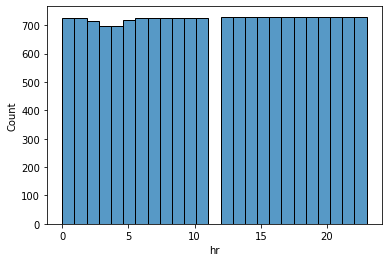

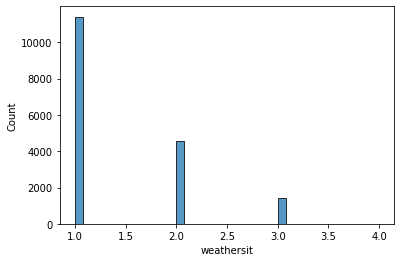

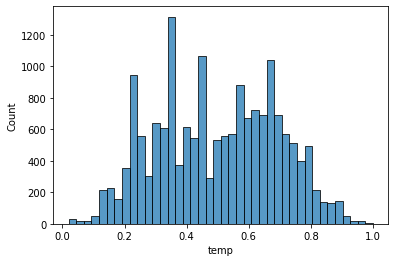

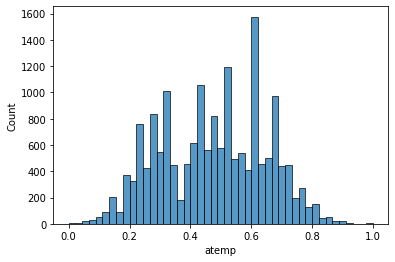

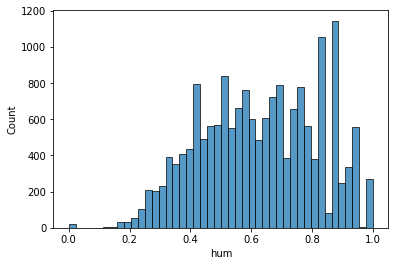

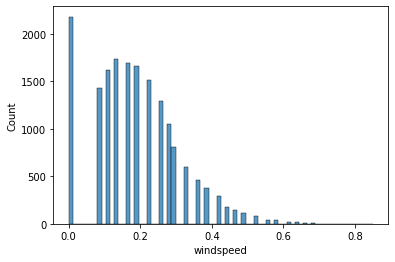

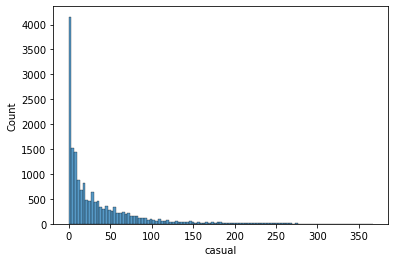

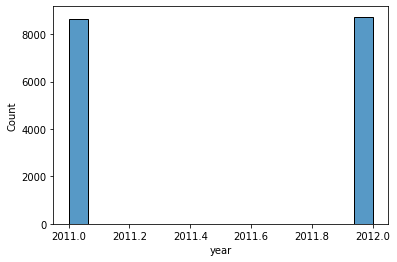

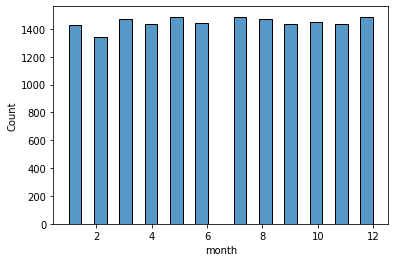

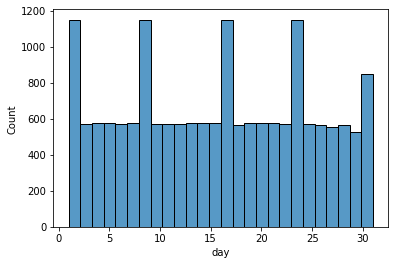

In [104]:
for i in df_c.columns:
    sns.histplot(df_c[i])
    plt.show()

In [105]:
df_c.isna().sum()

hr            0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
year          0
month         0
day           0
dtype: int64

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
df_c= (df_c-df_c.mean())/df_c.std()

In [108]:
x_train = df_c.iloc[:10948,:]
x_test = df_c.iloc[10948:,:]

In [109]:
x_train.shape

(10948, 10)

In [110]:
x_test.shape

(6431, 10)

<AxesSubplot:xlabel='cnt', ylabel='Count'>

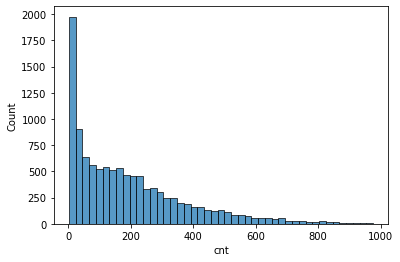

In [112]:
sns.histplot(y_train)

In [114]:
y_train = (y_train-min(y_train))/(max(y_train)-min(y_train))

In [117]:
lr = LinearRegression()

In [116]:
from sklearn.model_selection import cross_val_score

In [118]:
cv = cross_val_score(lr,x_train,y_train,cv=10)

In [120]:
cv.mean()

0.5643958952200537

In [122]:
lr.fit(x_train,y_train).predict(x_test)

array([0.61629677, 0.17450356, 0.03917648, ..., 0.06647109, 0.26626685,
       0.03927345])